In [1]:
import numpy as np
from ML.knn import kNN_classify
from ML.metrics import accuracy_score
from ML.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
X = np.loadtxt('x.txt')
X= X[:,2:]
y = np.loadtxt('y.txt')
X[y==0,0]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.5, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

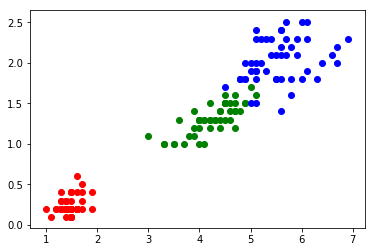

In [46]:
plt.scatter(X[y==0,0],X[y==0,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='g')
plt.scatter(X[y==2,0],X[y==2,1],color='b')

In [47]:
def gini(y):
    counter = Counter(y)
    result = 0
    for v in counter.values():
        result += (v/len(y))**2
    return 1-result
def cut(X,y,d,v):
    ind_left = (X[:,d] <= v)
#     print(ind_left)
    ind_right = (X[:,d] >= v)
    return X[ind_left],X[ind_right],y[ind_left],y[ind_right]


def try_split(X,y):
    best_g = 1
    best_d = -1
    best_v = -1
    for d in range(X.shape[1]):
        sorted_index = np.argsort(X[:,d])
#         print(sorted_index)
        for i in range(len(X)-1):
            if X[sorted_index[i],d] == X[sorted_index[i+1],d]:
                continue
            v = (X[sorted_index[i],d]+X[sorted_index[i+1],d])/2
#             print("d={}, v={}".format(d,v))
            X_left,X_right,y_left,y_right = cut(X,y,d,v)
            g_all = gini(y_left)+gini(y_right)
            
            if g_all < best_g:
                best_g = g_all
                best_d = d
                best_v = v
    return best_d,best_v ,best_g 

In [48]:
try_split(X,y)

(0, 2.45, 0.5)

In [59]:
class Node():
    def __init__(self,d= None,v= None,g= None,l= None):
        self.dim = d
        self.value = v
        self.gini =g
        self.label =l
        self.children_left = None
        self.children_right = None
    def __repr__(self):
        return 'Node(d={},v={},g={},l={})'.format(self.dim,self.value,self.gini,self.label)

In [68]:
def create_tree(X,y):
    d,v,g = try_split(X,y)
    if d ==-1 or g==0:
        return None    
    node = Node(d,v,g) #根节点
    
    X_left,X_right,y_left,y_right = cut(X,y,d,v)
    
    node.children_left = create_tree(X_left,y_left)    
    if node.children_left is None:
        label = Counter(y_left).most_common(1)[0][0]
        node.children_left = Node(l=label)
        
    node.children_right = create_tree(X_right,y_right)          
    if node.children_right is None:
        label = Counter(y_right).most_common(1)[0][0]
        node.children_right = Node(l=label)
    
    return node

In [69]:
tree = create_tree(X,y)

In [70]:
print(tree.children_left)

Node(d=None,v=None,g=None,l=0.0)


In [81]:
print(tree.children_right.children_left)

Node(d=0,v=5.35,g=0.10872781065088755,l=None)


In [86]:
def show_tree(node):
    if node is None:
        return ''
    result = ''
    if node.children_right is not None:
        result += '"{}"->"{}"\n'.format(id(node), id(node.children_right)
        result += show_tree(node.children_right)
    if node.children_left is not None:
        result += '"{}"->"{}"\n'.format(id(node), id(node.children_left)
         result += show_tree(node.children_left)
    return result

In [87]:
print('digraph{\n')
print(show_tree(tree))
print('}\n')

digraph{

"Node(d=0,v=2.45,g=0.5,l=None)"->"Node(d=1,v=1.75,g=0.21057149006459386,l=None)"
"Node(d=0,v=2.45,g=0.5,l=None)"->"Node(d=None,v=None,g=None,l=0.0)"

}

